In [379]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [380]:
temp_df = pd.read_csv(r'..\Data files\train.csv')

In [381]:
train_df = pd.read_csv(r'..\Data files\train.csv')
test_df = pd.read_csv(r'..\Data files\test.csv')
train_df = pd.concat([train_df,test_df],axis=0,ignore_index=True)
survived = train_df['Survived']
train_df = train_df.drop(['Survived'],axis=1)
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [382]:
train_df.drop(['PassengerId'],axis=1,inplace=True)

# Clean Up!

In [383]:
train_df.isna().mean().sort_values(ascending=False).head(5)

Cabin       0.774637
Age         0.200917
Embarked    0.001528
Fare        0.000764
Ticket      0.000000
dtype: float64

### We can use Data to Fill the NA values

In [384]:
train_df.loc[train_df['Fare'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [385]:
#### We can use PClass for Fare
Pclass3Fare = train_df[train_df['Pclass']==3]['Fare'].mean()
train_df['Fare'].fillna(Pclass3Fare,inplace=True)
print("Changed NA value with: {}".format(Pclass3Fare))

Changed NA value with: 13.302888700564973


In [386]:
train_df.loc[train_df['Embarked'].isna()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [387]:
#We can use Fare to decide Embarked
CFare = train_df.loc[train_df['Embarked'] == 'C']['Fare'].mean()
SFare = train_df.loc[train_df['Embarked'] == 'S']['Fare'].mean()
QFare  = train_df.loc[train_df['Embarked'] == 'Q']['Fare'].mean()
print("Fare for: C class: {}\n\t  S class: {}\n\t  Q class: {}".format(CFare,SFare,QFare))

Fare for: C class: 62.33626740740739
	  S class: 27.403379746937162
	  Q class: 12.409012195121951


In [388]:
train_df['Embarked'].fillna('C',inplace=True)
print("Changed NA value with: C")

Changed NA value with: C


In [389]:
###Upto 70% of cabin values were empty so their must be reason
### I thought Empty values might be people without cabin
### Lets see, this insight can help us to classify survival
temp_df.loc[temp_df['Cabin'].isna(),'Survived'].value_counts()

0    481
1    206
Name: Survived, dtype: int64

In [390]:
train_df['Cabin'].fillna('None',inplace=True)
print("Changed NA value with: None")

Changed NA value with: None


In [391]:
#We can extract tital from name (..Mr, Mrs, Miss) by using this values we can fill empty ages
name = [i.split(',')[1].strip() for i in list(train_df['Name'].values)]
title = []
for i in name:
    extension = i.split('.')[0]
    if extension == 'Mr' or extension == 'Mrs' or extension == 'Miss' or extension == 'Master':
        title.append(extension)
    else:
        title.append('Other')       
train_df['Title'] = title

In [392]:
Mr_mean = round(np.nanmean(train_df.loc[train_df['Title'] == 'Mr','Age'].values))
Miss_mean = round(np.nanmean(train_df.loc[train_df['Title'] == 'Miss','Age'].values))
Mrs_mean = round(np.nanmean(train_df.loc[train_df['Title'] == 'Mrs','Age'].values))
Master_mean = round(np.nanmean(train_df.loc[train_df['Title'] == 'Master','Age'].values))
Other_mean = round(np.nanmean(train_df.loc[train_df['Title'] == 'Other','Age'].values))

In [393]:
for i,y in enumerate(train_df['Age'].values):  
    if np.isnan(train_df['Age'][i]):
        y = train_df['Title'][i]
        if y == 'Mr':
            train_df.loc[i,'Age'] = Mr_mean
        if y == 'Miss':
            train_df.loc[i,'Age'] = Miss_mean 
        if y == 'Mrs':
            train_df.loc[i,'Age'] = Mrs_mean 
        if y == 'Master':
            train_df.loc[i,'Age'] = Master_mean 
        if y == 'Other':
            train_df.loc[i,'Age'] = Other_mean 

In [394]:
temp = train_df

In [395]:
train_df = train_df.iloc[:891,:]
test_df = temp.iloc[891:,:]

In [396]:
train_df = pd.concat([train_df,survived[:891]],axis=1)
test_df = pd.concat([test_df,survived[891:]],axis=1)

# Done with cleaning, Lets find more insights 

# 

## Data is balanced or not?

<AxesSubplot:xlabel='Survived', ylabel='count'>

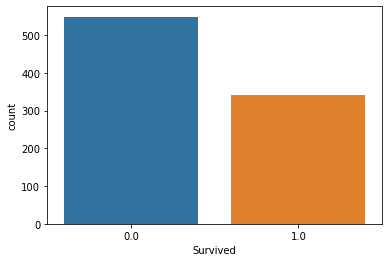

In [397]:
sns.countplot(data= train_df,x='Survived')

#### Data is not highly unbalanced

# 

## Lets see distribution of Fare 

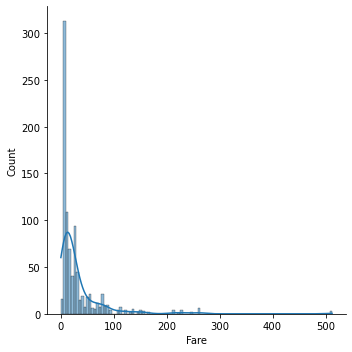

In [398]:
sns.displot(train_df['Fare'],kde=True)

In [399]:
train_df[train_df['Fare'] > 300]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Survived
258,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,None,C,Miss,1.0
679,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,1.0
737,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,1.0


### this seems reasonable, they had class 1 and embark was C, Thier ticket number is also same. This might not be outlier.

# 

# Rather than using Age as Numeric Data we can use it as categorical data, will it make change?

tem2 = train_df

<AxesSubplot:xlabel='Age', ylabel='Fare'>

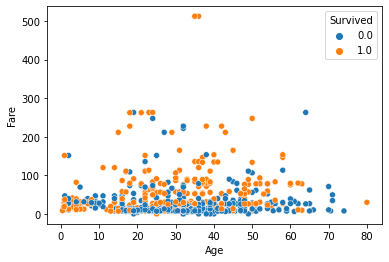

In [402]:
sns.scatterplot(data=tem2,x='Age',y='Fare',hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Survived'>

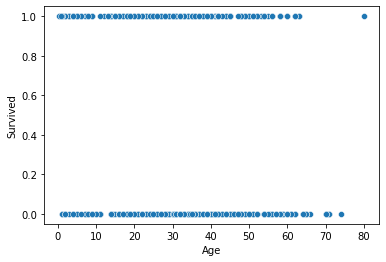

In [403]:
sns.scatterplot(data=tem2,x='Age',y='Survived')

### As you can in both the plots see that after age 60, number of not survied are greater than survied 

In [404]:
tem2['Age type'] = 0
tem2.loc[tem2['Age'] < 16,'Age type'] = 'Child'
tem2.loc[tem2['Age'].between(16,60),'Age type'] = 'Adult'
tem2.loc[tem2['Age'] > 60,'Age type'] = 'Old'

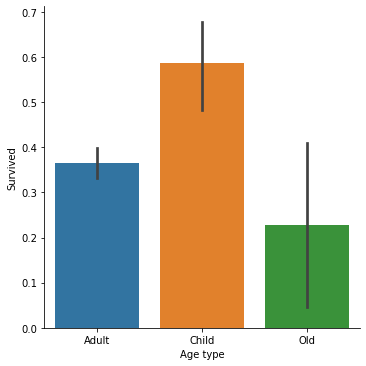

In [406]:
g = sns.catplot(x='Age type',y='Survived',data=tem2,kind='bar')

## This is clearly making some impact on survival rate

In [407]:
train_df['Age type'] = 0
train_df.loc[train_df['Age'] < 16,'Age type'] = 'Child'
train_df.loc[train_df['Age'].between(16,60),'Age type'] = 'Adult'
train_df.loc[train_df['Age'] > 60,'Age type'] = 'Old'

test_df['Age type'] = 0
test_df.loc[test_df['Age'] < 16,'Age type'] = 'Child'
test_df.loc[test_df['Age'].between(16,60),'Age type'] = 'Adult'
test_df.loc[test_df['Age'] > 60,'Age type'] = 'Old'

# 

# 

# What if we add number of siblings / spouses aboard the Titanic and number of parents / children aboard the Titanic?

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

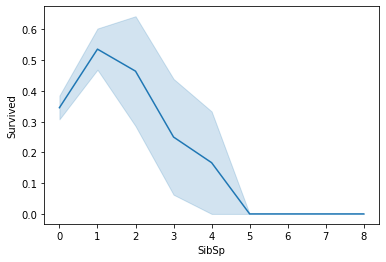

In [408]:
sns.lineplot(data = train_df ,x= 'SibSp',y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

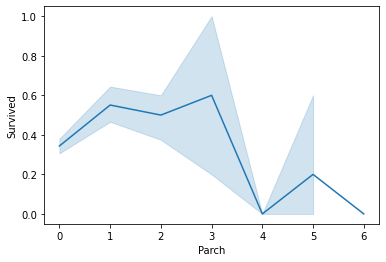

In [409]:
sns.lineplot(data = train_df ,x= 'Parch',y='Survived')

In [410]:
Sibsp = train_df['SibSp'].values
Parch = train_df['Parch'].values
family_size = np.add(Sibsp,Parch)
temp2['Family size'] = family_size

<AxesSubplot:xlabel='Family size', ylabel='Survived'>

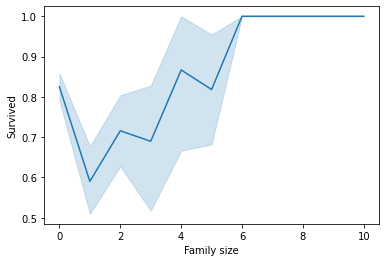

In [411]:
sns.lineplot(data = temp2 ,x= 'Family size',y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='SibSp'>

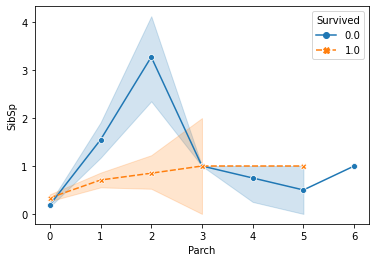

In [412]:
sns.lineplot(data = train_df ,x= 'Parch',y='SibSp',hue='Survived',style='Survived',markers=True)

## We'll keep Parch and SibSp different 

# 

# 

# At the last, we'll analyse Embarked and Cabin

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

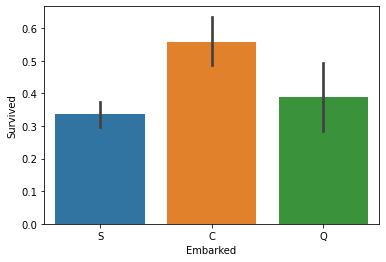

In [415]:
sns.barplot(data= train_df, x = 'Embarked',y ='Survived')

# 

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

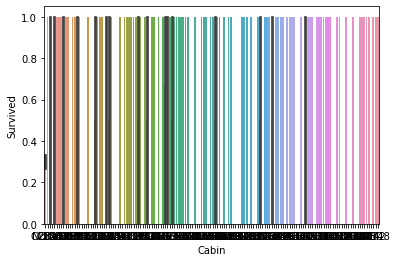

In [248]:
sns.barplot(data= train_df, x = 'Cabin',y ='Survived')

In [452]:
temp1.loc[temp1['Cabin'] == 'None','Cabin'] = 'No'
temp1.loc[temp1['Cabin'] != 'No','Cabin']   = 'Yes'

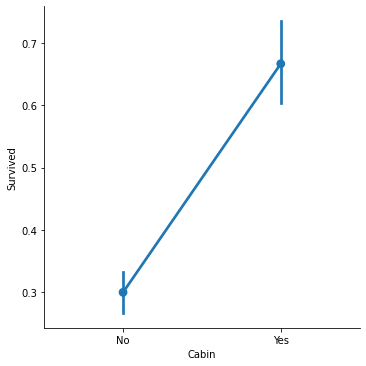

In [453]:
sns.catplot(data= temp1, x = 'Cabin',y ='Survived',kind='point')

In [455]:
test_df.loc[test_df['Cabin'] == 'None','Cabin'] = 'No'
test_df.loc[test_df['Cabin'] != 'No','Cabin']   = 'Yes'

In [456]:
train_df.loc[train_df['Cabin'] == 'None','Cabin'] = 'No'
train_df.loc[train_df['Cabin'] != 'No','Cabin']   = 'Yes'

# 

# 

# Lets do some Feature Scaling

temp1 = train_df.copy()

temp2 = test_df.copy()

In [470]:
scaled_data = train_df.copy()
scaled_data = pd.concat([scaled_data,test_df])
scaled_data = scaled_data.drop(['Survived'],axis=1)
Categorical = scaled_data.drop(['Fare','Name','Ticket','Age'],axis=1)
Numerical = scaled_data[['Fare']]

In [471]:
Categorical

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,Age type
0,3,male,1,0,No,S,Mr,Adult
1,1,female,1,0,Yes,C,Mrs,Adult
2,3,female,0,0,No,S,Miss,Adult
3,1,female,1,0,Yes,S,Mrs,Adult
4,3,male,0,0,No,S,Mr,Adult
...,...,...,...,...,...,...,...,...
1304,3,male,0,0,No,S,Mr,Adult
1305,1,female,0,0,Yes,C,Other,Adult
1306,3,male,0,0,No,S,Mr,Adult
1307,3,male,0,0,No,S,Mr,Adult


In [474]:
Numerical 

,Fare
0,7.2500
1,71.2833
2,7.9250
3,53.1000
4,8.0500
...,...
1304,8.0500
1305,108.9000
1306,7.2500
1307,8.0500


In [475]:
from sklearn.preprocessing import OneHotEncoder

In [485]:
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
encoded_cat = pd.DataFrame(enc.fit_transform(Categorical).toarray())

In [502]:
from sklearn.preprocessing import StandardScaler

In [507]:
scalar = MinMaxScaler()
scalar.fit(Numerical)
std_Numerical = pd.DataFrame(scalar.transform(Numerical))

In [510]:
final = pd.concat([std_Numerical,encoded_cat],axis=1)
final

,0,0,1,2,3,4,5,6,7,8,...,23,24,25,26,27,28,29,30,31,32
0,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1305,0.212559,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1306,0.014151,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1307,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [514]:
train_data = final.iloc[:891,:]
test_data = final.iloc[891:,:]

In [516]:
train_data = pd.concat([train_data,survived[:891]],axis=1)
test_data = pd.concat([test_data,survived[891:]],axis=1)

# 

# 

# Lets build model

In [688]:
X = train_data.drop(['Survived'],axis=1).values
Y = train_data['Survived'].values

In [810]:
from sklearn.model_selection import train_test_split

In [1011]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.1)



print("Training feature: {}".format(X_train.shape))
print("Training labels: {}".format(y_train.shape))
print("Testing feature: {}".format(X_test.shape))
print("Testing labels: {}".format(y_test.shape))


Training feature: (801, 34)
Training labels: (801,)
Testing feature: (90, 34)
Testing labels: (90,)


In [989]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7948007149862153642,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12242392670501293308
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3032612864
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12932628048934857724
 physical_device_desc: "device: 0, name: GeForce GTX 1650 SUPER, pci bus id: 0000:06:00.0, compute capability: 7.5",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6646558149616537897
 physical_device_desc: "device: XLA_GPU device"]

In [990]:
from keras.layers import Dense
from keras.layers import Dropout
from keras import Sequential
import keras
import tensorflow as tf

In [991]:
weight_for_0 = (891 / 549)/2.0 
weight_for_1 = (891 / 342)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.81
Weight for class 1: 1.30


In [992]:
ob = np.log([549/342])
output_bias = tf.keras.initializers.Constant(ob)
print("output_bias: {}".format(ob))

output_bias: [0.4732877]


In [1048]:
model = Sequential(
[
    Dense(16,activation='relu',name='Input_Dense_Layer',input_shape = (34,)),
    Dense(32,activation='relu',name='Layer1',input_shape = (34,)),

    Dense(1, activation='sigmoid',name="output_layer",bias_initializer=output_bias)
]
)

In [1049]:
model.input,model.output

(<tf.Tensor 'Input_Dense_Layer_input_42:0' shape=(None, 34) dtype=float32>,
 <tf.Tensor 'output_layer/Sigmoid_32:0' shape=(None, 1) dtype=float32>)

In [1086]:

METRICS = [
     
      keras.metrics.FalsePositives(name='fp'),
     
      

      keras.metrics.AUC(name='auc'),
]

In [1087]:
model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-5),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=METRICS)

In [1088]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Dense_Layer (Dense)    (None, 16)                560       
_________________________________________________________________
Layer1 (Dense)               (None, 32)                544       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,137
Trainable params: 1,137
Non-trainable params: 0
_________________________________________________________________


In [1089]:
results = model.evaluate(X_train, y_train, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3624


In [1090]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [1091]:
EPOCHS = 50

In [1092]:
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    class_weight = class_weight,
    )

Epoch 1/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3672 - fp: 80.0000 - auc: 0.9127
Epoch 2/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3672 - fp: 80.0000 - auc: 0.9129
Epoch 3/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9131
Epoch 4/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9129
Epoch 5/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9127
Epoch 6/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9129
Epoch 7/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9132
Epoch 8/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9131
Epoch 9/50
26/26 [==============================] - 0s 2ms/step - loss: 0.3671 - fp: 80.0000 - auc: 0.9132
Epoch 10/50
26/26 [==================

<AxesSubplot:>

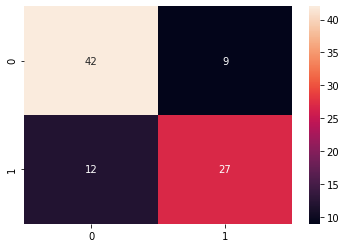

In [1093]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test) > 0.5
clf = confusion_matrix(y_test > 0.5,y_pred)
sns.heatmap(clf, annot=True,fmt='g')

In [1084]:
from sklearn.metrics import f1_score

In [1085]:
f1_score(y_test,y_pred)

0.7199999999999999

In [849]:
submit = test_data.drop(['Survived'],axis=1).values

In [850]:
submit_survival = model.predict(submit)

In [851]:
submit_survival[submit_survival > 0.5] = 1
submit_survival[submit_survival < 0.5] = 0
submit_survival = submit_survival.astype('int64')

In [852]:
Sumbission = pd.read_csv(r'..\Data files\gender_submission.csv')
Sumbission.drop('Survived',axis=1,inplace=True)
Sumbission['Survived'] = submit_survival

In [853]:
Sumbission['Survived'].value_counts()

0    236
1    182
Name: Survived, dtype: int64

In [855]:
Sumbission.to_csv(r'C:\Users\Akhilesh\Desktop\Programs\Data science\Work\Titanic\Submissions\Submission9.csv',index=False)